In [2]:
import requests
import zipfile
import pandas as pd
from io import BytesIO

url = 'https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/data/processed/Processed_Data_v2.zip?raw=true'

# Download the zip file
response = requests.get(url)
zip_content = BytesIO(response.content)

# Unzip the file
with zipfile.ZipFile(zip_content, 'r') as zip_ref:
    # Extract all the contents into the current directory
    zip_ref.extractall()

    csv_filename = zip_ref.namelist()[0]

    # Read the CSV file
    mvc_processed = pd.read_csv(csv_filename)

In [3]:
# Convert CRASH DATE and CRASH TIME to datetime
mvc_processed['CRASH DATE'] = pd.to_datetime(mvc_processed['CRASH DATE'])

mvc_processed['CRASH TIME'] = pd.to_datetime(mvc_processed['CRASH TIME'], format='%H:%M:%S').dt.time

In [4]:
# Decompose date and time

mvc_processed['year'] = mvc_processed['CRASH DATE'].dt.year
mvc_processed['month'] = mvc_processed['CRASH DATE'].dt.month
mvc_processed['day'] = mvc_processed['CRASH DATE'].dt.day
mvc_processed['dayofweek'] = mvc_processed['CRASH DATE'].dt.dayofweek  # Monday=0, Sunday=6

mvc_processed['temp_datetime'] = pd.to_datetime(mvc_processed['CRASH TIME'].astype(str))

mvc_processed['hour'] = mvc_processed['temp_datetime'].dt.hour
mvc_processed['minute'] = mvc_processed['temp_datetime'].dt.minute
mvc_processed['second'] = mvc_processed['temp_datetime'].dt.second

# Drop the temporary datetime column used for extracting time
mvc_processed.drop(['temp_datetime', 'CRASH DATE', 'CRASH TIME', 'second'], axis=1, inplace=True)

<ipython-input-4-fa4f9e383963>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mvc_processed['temp_datetime'] = pd.to_datetime(mvc_processed['CRASH TIME'].astype(str))


In [5]:
# Encode the features and targets

from sklearn.preprocessing import LabelEncoder

# Create features set
X = mvc_processed.drop('CLASS TYPE', axis=1)
y = mvc_processed['CLASS TYPE']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Encode categorical variables
X_encoded = pd.get_dummies(X)

In [6]:
# Split data into trianing and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, stratify=y, test_size=0.2, random_state=42)

In [7]:
# Scale the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the models
log_reg = LogisticRegression()
rand_forest = RandomForestClassifier()
xgb = XGBClassifier()
knn = KNeighborsClassifier()

# Train the models
log_reg.fit(X_train_scaled, y_train)
rand_forest.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)

# Predictions
log_reg_pred = log_reg.predict(X_test_scaled)
rand_forest_pred = rand_forest.predict(X_test_scaled)
xgb_pred = xgb.predict(X_test_scaled)
knn_pred = knn.predict(X_test_scaled)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Classification Report for Logistic Regression:



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.82      0.97      0.89    164839
           1       0.71      0.27      0.39     46258
           2       0.00      0.00      0.00       206
           3       0.00      0.00      0.00       181

    accuracy                           0.81    211484
   macro avg       0.38      0.31      0.32    211484
weighted avg       0.80      0.81      0.78    211484

Confusion Matrix for Logistic Regression:

[[159760   5079      0      0]
 [ 33727  12531      0      0]
 [   179     27      0      0]
 [   101     80      0      0]]


Classification Report for Random Forest:



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      0.96      0.90    164839
           1       0.72      0.33      0.46     46258
           2       1.00      0.00      0.01       206
           3       0.00      0.00      0.00       181

    accuracy                           0.82    211484
   macro avg       0.64      0.33      0.34    211484
weighted avg       0.81      0.82      0.80    211484

Confusion Matrix for Random Forest:

[[158809   6030      0      0]
 [ 30824  15434      0      0]
 [   181     24      1      0]
 [    87     94      0      0]]


Classification Report for XGBoost:



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      0.96      0.90    164839
           1       0.73      0.34      0.46     46258
           2       0.00      0.00      0.00       206
           3       0.00      0.00      0.00       181

    accuracy                           0.83    211484
   macro avg       0.39      0.33      0.34    211484
weighted avg       0.81      0.83      0.80    211484

Confusion Matrix for XGBoost:

[[159026   5813      0      0]
 [ 30606  15652      0      0]
 [   179     27      0      0]
 [    92     89      0      0]]


Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.84      0.93      0.88    164839
           1       0.58      0.35      0.44     46258
           2       0.00      0.00      0.00       206
           3       0.00      0.00      0.00       181

    accuracy                           0.80    211484
   macro avg       0.35      0.32      0.33    21

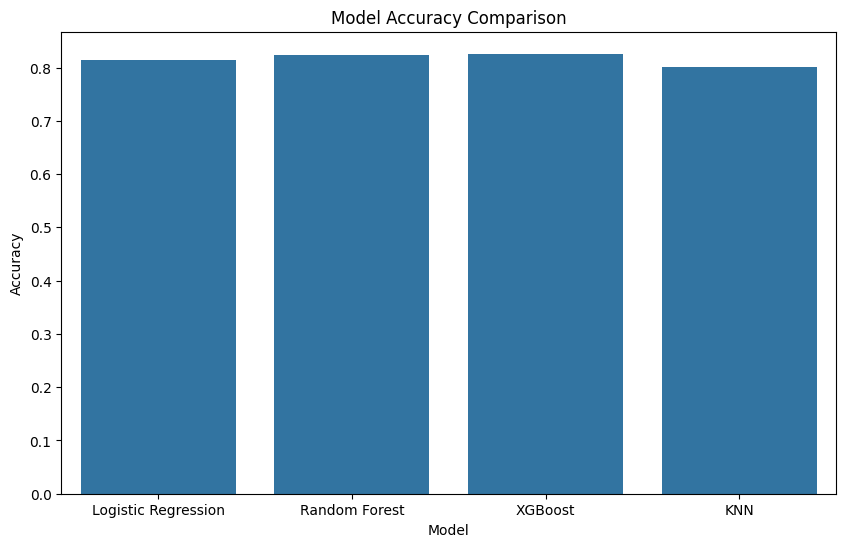

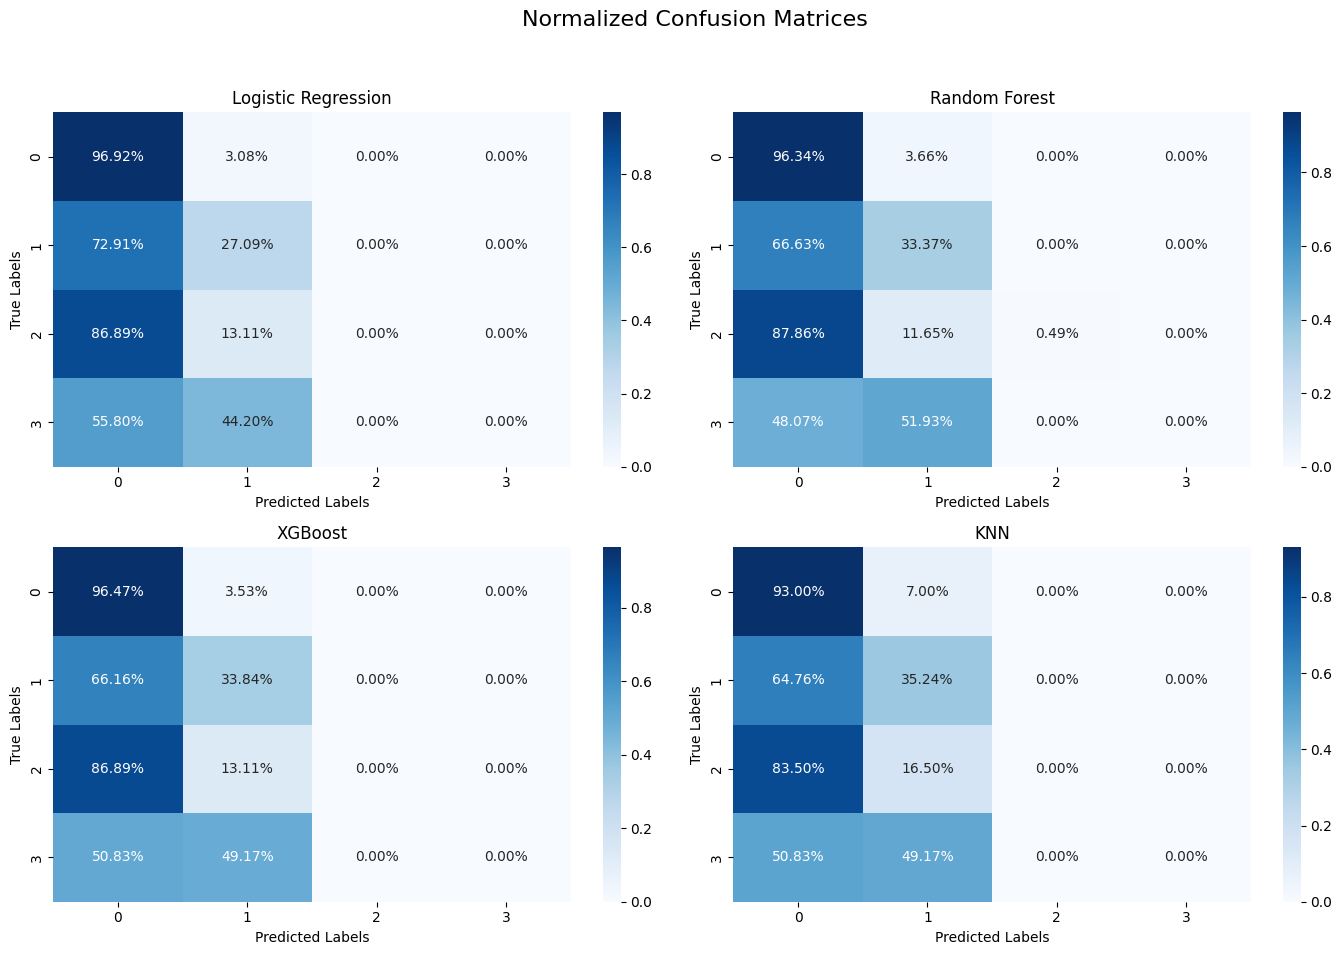

In [ ]:
# Evaluate the models
models = {
    'Logistic Regression': log_reg_pred,
    'Random Forest': rand_forest_pred,
    'XGBoost': xgb_pred,
    'KNN': knn_pred
}

# Create a DataFrame to store the results
results = []

for model_name, predictions in models.items():
    report = classification_report(y_test, predictions, output_dict=True)
    accuracy = accuracy_score(y_test, predictions)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Class 0 Precision': report['0']['precision'],
        'Class 1 Precision': report['1']['precision'],
        'Class 2 Precision': report['2']['precision'],
        'Class 3 Precision': report['3']['precision'],
    })

results_df = pd.DataFrame(results)

# Print classification report and confusion matrix
for model_name, predictions in models.items():
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, predictions))
    print(f"Confusion Matrix for {model_name}:\n")
    cm = confusion_matrix(y_test, predictions)
    print(cm)
    print("\n")

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

# Plot Normalized Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Normalized Confusion Matrices', fontsize=16)

for ax, (model_name, predictions) in zip(axes.flatten(), models.items()):
    cm = confusion_matrix(y_test, predictions, normalize='true')
    sns.heatmap(cm, annot=True, fmt='.2%', ax=ax, cmap='Blues')
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **Apply ADASYN to address class imbalance**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN

# Apply ADASYN
adasyn = ADASYN(sampling_strategy='not majority', random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Initialize the models with n_jobs=-1 where applicable
log_reg_adasyn = LogisticRegression(max_iter=1000, n_jobs=-1)
rand_forest_adasyn = RandomForestClassifier(n_jobs=-1)
xgb_adasyn = XGBClassifier(n_jobs=-1)
knn_adasyn = KNeighborsClassifier(n_jobs=-1)

# Train the models
log_reg_adasyn.fit(X_resampled, y_resampled)
rand_forest_adasyn.fit(X_resampled, y_resampled)
xgb_adasyn.fit(X_resampled, y_resampled)
knn_adasyn.fit(X_resampled, y_resampled)

# Predictions
log_reg_adasyn_pred = log_reg_adasyn.predict(X_test_scaled)
rand_forest_adasyn_pred = rand_forest_adasyn.predict(X_test_scaled)
xgb_adasyn_pred = xgb_adasyn.predict(X_test_scaled)
knn_adasyn_pred = knn_adasyn.predict(X_test_scaled)

Classification Report for Logistic Regression (ADASYN):

              precision    recall  f1-score   support

           0       0.89      0.51      0.65    164839
           1       0.32      0.22      0.26     46258
           2       0.00      0.53      0.00       206
           3       0.00      0.82      0.01       181

    accuracy                           0.45    211484
   macro avg       0.30      0.52      0.23    211484
weighted avg       0.77      0.45      0.56    211484

Confusion Matrix for Logistic Regression (ADASYN):

[[83970 21654 38827 20388]
 [10141 10284 10411 15422]
 [   49    35   110    12]
 [    6     7    20   148]]


Classification Report for Random Forest (ADASYN):

              precision    recall  f1-score   support

           0       0.85      0.91      0.88    164839
           1       0.59      0.44      0.50     46258
           2       0.05      0.00      0.01       206
           3       0.00      0.00      0.00       181

    accuracy          

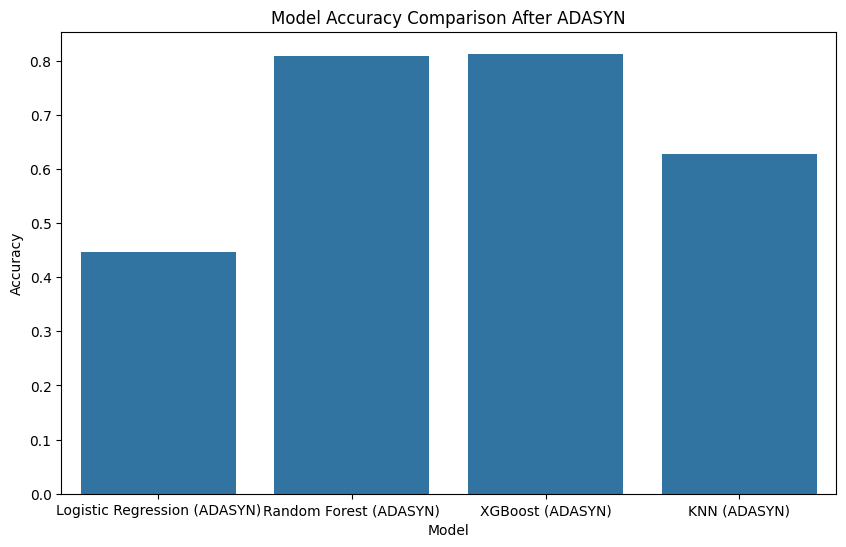

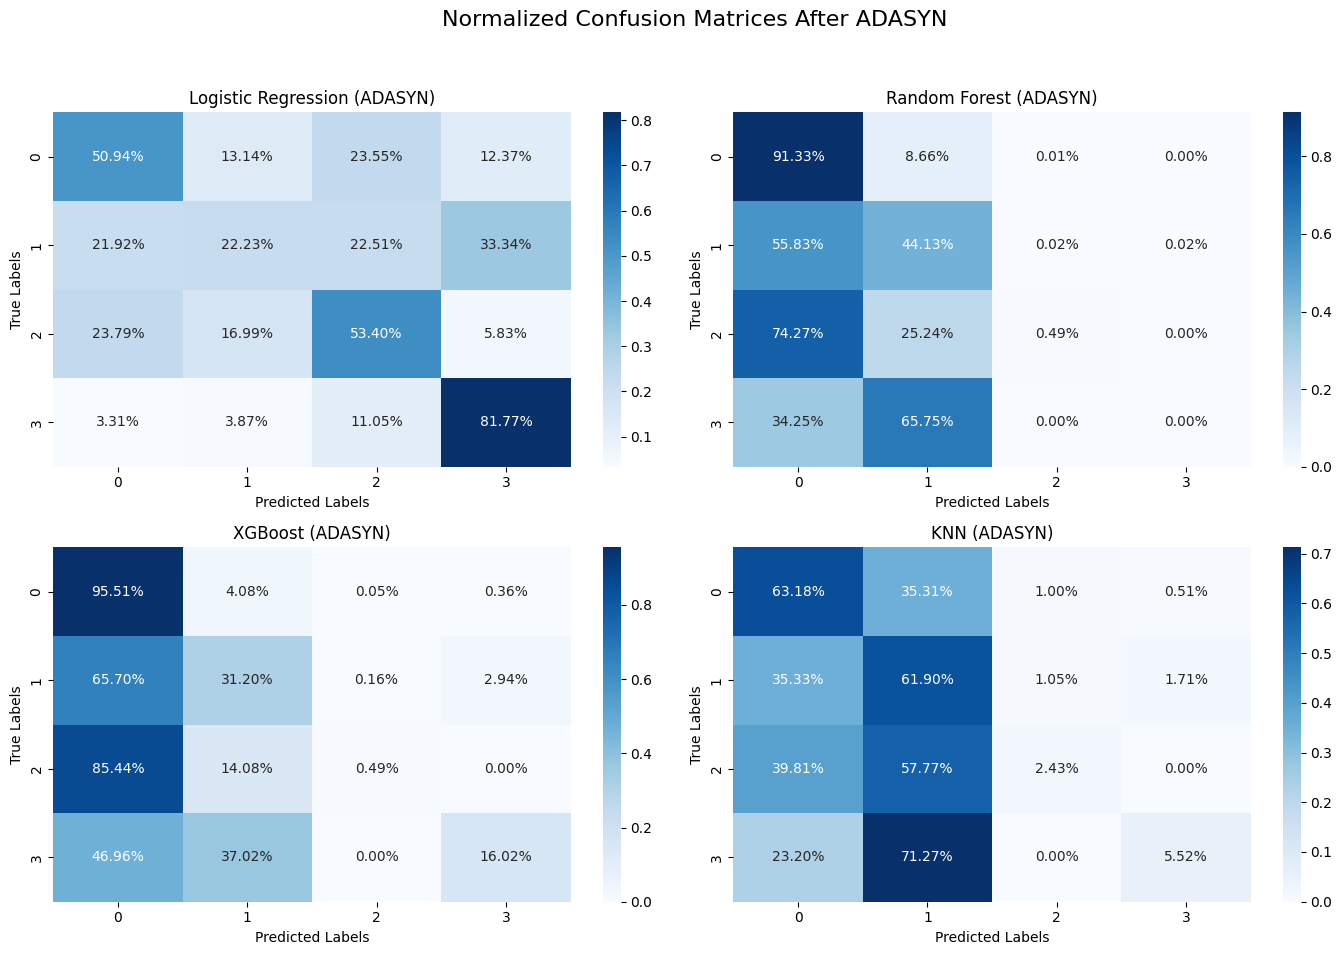

In [ ]:
# Evaluate the models
models_adasyn = {
    'Logistic Regression (ADASYN)': log_reg_adasyn_pred,
    'Random Forest (ADASYN)': rand_forest_adasyn_pred,
    'XGBoost (ADASYN)': xgb_adasyn_pred,
    'KNN (ADASYN)': knn_adasyn_pred
}

# Create a DataFrame to store the results
results_adasyn = []

for model_name, predictions in models_adasyn.items():
    report = classification_report(y_test, predictions, output_dict=True)
    accuracy = accuracy_score(y_test, predictions)
    results_adasyn.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Class 0 Precision': report['0']['precision'],
        'Class 1 Precision': report['1']['precision'],
        'Class 2 Precision': report['2']['precision'],
        'Class 3 Precision': report['3']['precision'],
    })

results_adasyn_df = pd.DataFrame(results_adasyn)

# Print classification report and confusion matrix
for model_name, predictions in models_adasyn.items():
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, predictions))
    print(f"Confusion Matrix for {model_name}:\n")
    cm = confusion_matrix(y_test, predictions)
    print(cm)
    print("\n")

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_adasyn_df)
plt.title('Model Accuracy Comparison After ADASYN')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

# Plot Normalized Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Normalized Confusion Matrices After ADASYN', fontsize=16)

for ax, (model_name, predictions) in zip(axes.flatten(), models_adasyn.items()):
    cm = confusion_matrix(y_test, predictions, normalize='true')
    sns.heatmap(cm, annot=True, fmt='.2%', ax=ax, cmap='Blues')
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Random undersampling of majority class

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import label_binarize

# Apply Random Undersampling
undersampler = RandomUnderSampler(sampling_strategy='not majority', random_state=42)
X_resampled_under, y_resampled_under = undersampler.fit_resample(X_train_scaled, y_train)

# Initialize the models with n_jobs=-1 where applicable
log_reg_under = LogisticRegression(max_iter=1000, n_jobs=-1)
rand_forest_under = RandomForestClassifier(n_jobs=-1)
xgb_under = XGBClassifier(n_jobs=-1)
knn_under = KNeighborsClassifier(n_jobs=-1)

# Train the models
log_reg_under.fit(X_resampled_under, y_resampled_under)
rand_forest_under.fit(X_resampled_under, y_resampled_under)
xgb_under.fit(X_resampled_under, y_resampled_under)
knn_under.fit(X_resampled_under, y_resampled_under)

# Predictions
log_reg_under_pred = log_reg_under.predict(X_test_scaled)
rand_forest_under_pred = rand_forest_under.predict(X_test_scaled)
xgb_under_pred = xgb_under.predict(X_test_scaled)
knn_under_pred = knn_under.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Classification Report for Logistic Regression (Undersampling):



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88    164839
           1       0.00      0.00      0.00     46258
           2       0.00      0.00      0.00       206
           3       0.00      0.00      0.00       181

    accuracy                           0.78    211484
   macro avg       0.19      0.25      0.22    211484
weighted avg       0.61      0.78      0.68    211484

Confusion Matrix for Logistic Regression (Undersampling):

[[164839      0      0      0]
 [ 46255      0      3      0]
 [   206      0      0      0]
 [   181      0      0      0]]


Classification Report for Random Forest (Undersampling):



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88    164839
           1       0.00      0.00      0.00     46258
           2       1.00      0.00      0.01       206
           3       0.00      0.00      0.00       181

    accuracy                           0.78    211484
   macro avg       0.44      0.25      0.22    211484
weighted avg       0.61      0.78      0.68    211484

Confusion Matrix for Random Forest (Undersampling):

[[164839      0      0      0]
 [ 46258      0      0      0]
 [   205      0      1      0]
 [   181      0      0      0]]


Classification Report for XGBoost (Undersampling):

              precision    recall  f1-score   support

           0       0.78      1.00      0.88    164839
           1       0.62      0.00      0.00     46258
           2       0.00      0.00      0.00       206
           3       0.00      0.00      0.00       181

    accuracy                           0.78    211484
   macr

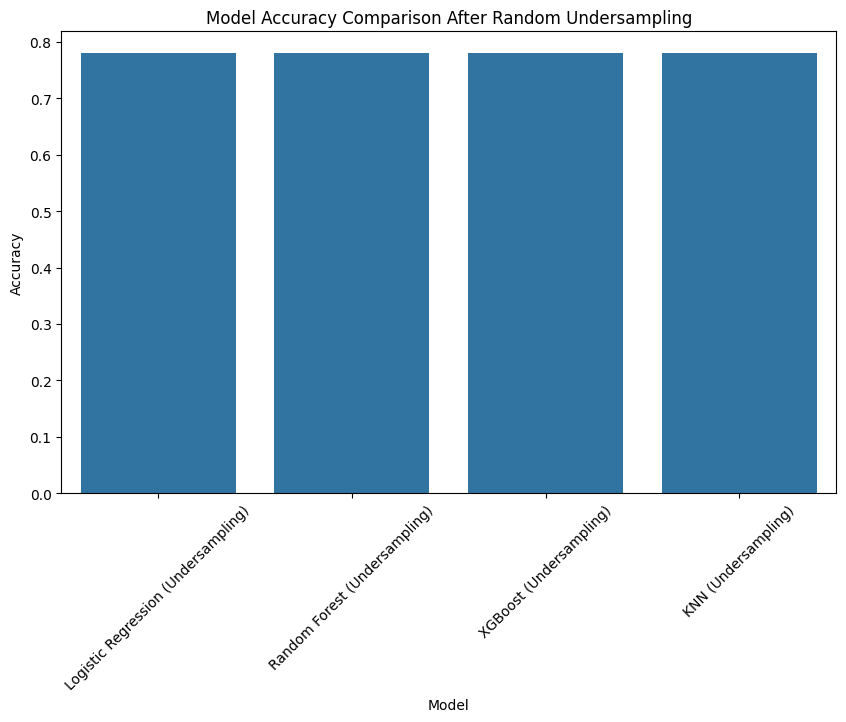

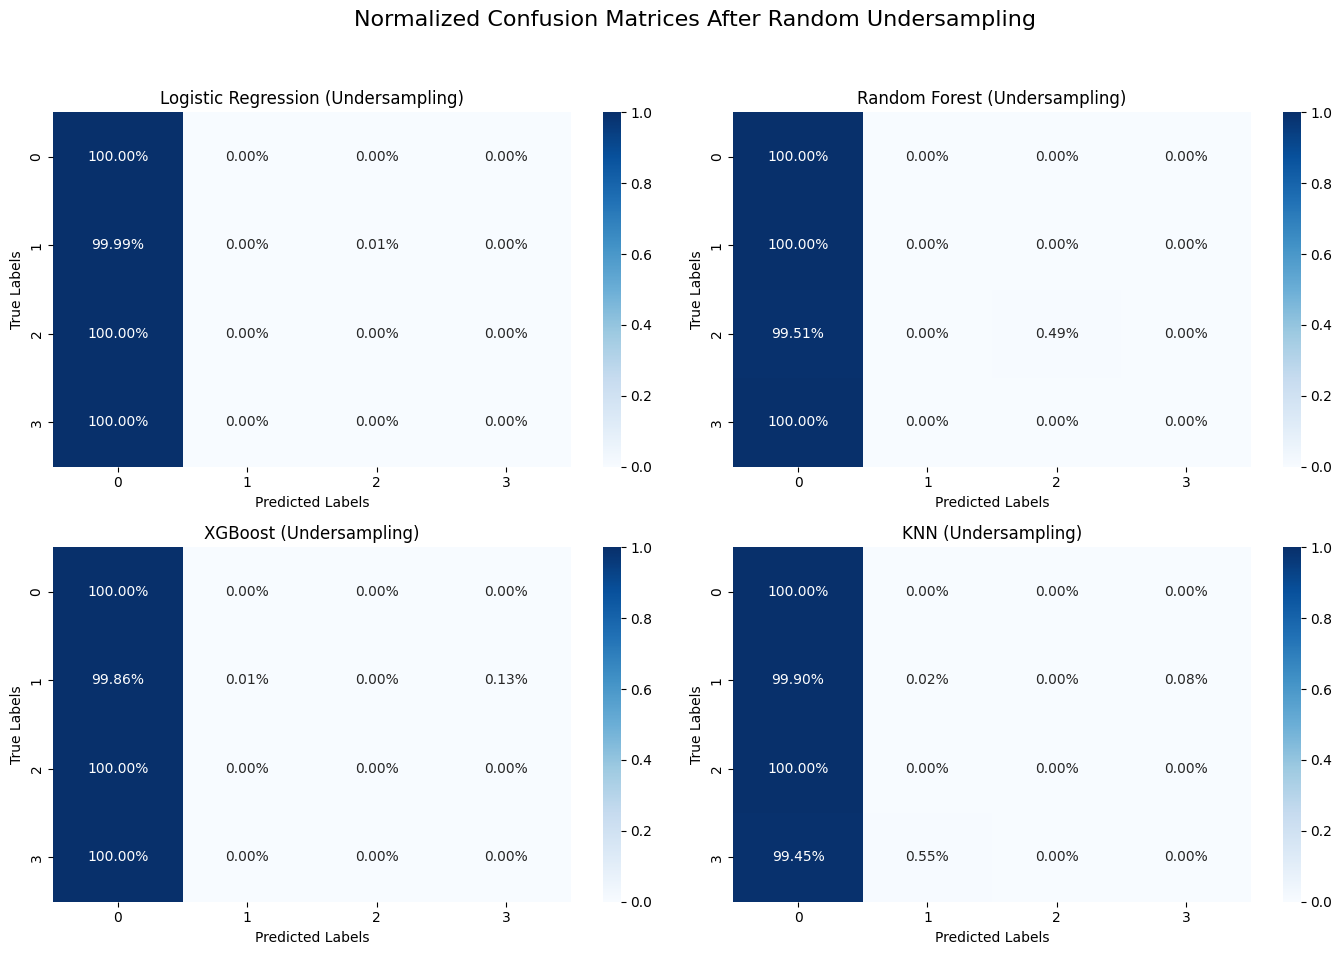

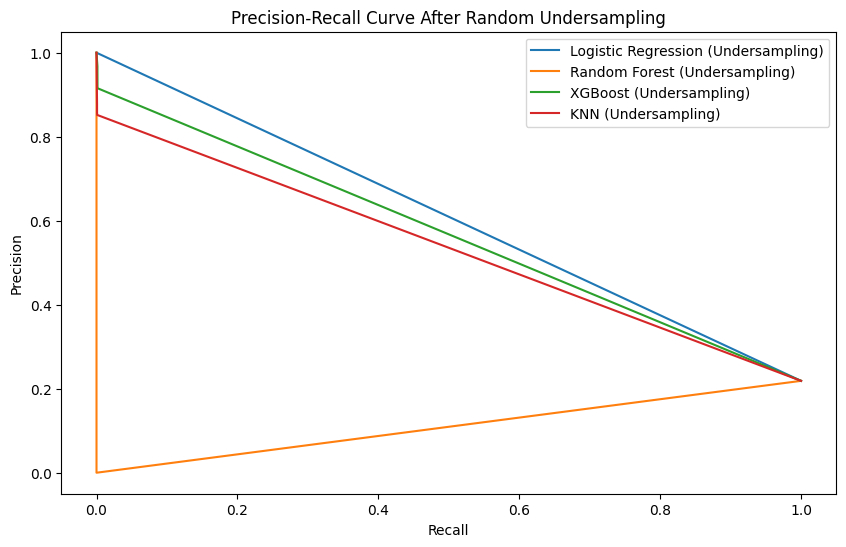

ValueError: Found input variables with inconsistent numbers of samples: [845936, 211484]

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Evaluate the models
models_under = {
    'Logistic Regression (Undersampling)': log_reg_under_pred,
    'Random Forest (Undersampling)': rand_forest_under_pred,
    'XGBoost (Undersampling)': xgb_under_pred,
    'KNN (Undersampling)': knn_under_pred
}

# Create a DataFrame to store the results
results_under = []

for model_name, predictions in models_under.items():
    report = classification_report(y_test, predictions, output_dict=True)
    accuracy = accuracy_score(y_test, predictions)
    results_under.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Class 0 Precision': report['0']['precision'],
        'Class 1 Precision': report['1']['precision'],
        'Class 2 Precision': report['2']['precision'],
        'Class 3 Precision': report['3']['precision'],
    })

results_under_df = pd.DataFrame(results_under)

# Print classification report and confusion matrix
for model_name, predictions in models_under.items():
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, predictions))
    print(f"Confusion Matrix for {model_name}:\n")
    cm = confusion_matrix(y_test, predictions)
    print(cm)
    print("\n")

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_under_df)
plt.title('Model Accuracy Comparison After Random Undersampling')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# Plot Normalized Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Normalized Confusion Matrices After Random Undersampling', fontsize=16)

for ax, (model_name, predictions) in zip(axes.flatten(), models_under.items()):
    cm = confusion_matrix(y_test, predictions, normalize='true')
    sns.heatmap(cm, annot=True, fmt='.2%', ax=ax, cmap='Blues')
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
for model_name, predictions in models_under.items():
    precision, recall, _ = precision_recall_curve(y_test, predictions, pos_label=1)
    plt.plot(recall, precision, label=f'{model_name}')
plt.title('Precision-Recall Curve After Random Undersampling')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(10, 6))
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
for model_name, predictions in models_under.items():
    fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), predictions.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve After Random Undersampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

# Plot F1 Score Comparison
f1_scores_under = pd.DataFrame(columns=['Model', 'Class 0 F1', 'Class 1 F1', 'Class 2 F1', 'Class 3 F1'])
for model_name, predictions in models_under.items():
    report = classification_report(y_test, predictions, output_dict=True)
    f1_scores_under = f1_scores_under.append({
        'Model': model_name,
        'Class 0 F1': report['0']['f1-score'],
        'Class 1 F1': report['1']['f1-score'],
        'Class 2 F1': report['2']['f1-score'],
        'Class 3 F1': report['3']['f1-score'],
    }, ignore_index=True)

plt.figure(figsize=(10, 6))
f1_scores_under.set_index('Model').T.plot(kind='bar')
plt.title('F1 Score Comparison After Random Undersampling')
plt.ylabel('F1 Score')
plt.xlabel('Class')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

# SMOTE

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize

# Apply SMOTE
smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train_scaled, y_train)

# Initialize the models with n_jobs=-1 where applicable
log_reg_smote = LogisticRegression(max_iter=1000, n_jobs=-1)
rand_forest_smote = RandomForestClassifier(n_jobs=-1)
xgb_smote = XGBClassifier(n_jobs=-1)
knn_smote = KNeighborsClassifier(n_jobs=-1)

# Train the models
log_reg_smote.fit(X_resampled_smote, y_resampled_smote)
rand_forest_smote.fit(X_resampled_smote, y_resampled_smote)
xgb_smote.fit(X_resampled_smote, y_resampled_smote)
knn_smote.fit(X_resampled_smote, y_resampled_smote)

# Predictions
log_reg_smote_pred = log_reg_smote.predict(X_test_scaled)
rand_forest_smote_pred = rand_forest_smote.predict(X_test_scaled)
xgb_smote_pred = xgb_smote.predict(X_test_scaled)
knn_smote_pred = knn_smote.predict(X_test_scaled)

Classification Report for Logistic Regression (SMOTE):

              precision    recall  f1-score   support

           0       0.89      0.54      0.67    164839
           1       0.38      0.20      0.26     46258
           2       0.00      0.54      0.00       206
           3       0.00      0.80      0.01       181

    accuracy                           0.47    211484
   macro avg       0.32      0.52      0.24    211484
weighted avg       0.77      0.47      0.58    211484

Confusion Matrix for Logistic Regression (SMOTE):

[[89758 15290 39623 20168]
 [11555  9229 10773 14701]
 [   56    29   111    10]
 [    7    10    20   144]]


Classification Report for Random Forest (SMOTE):

              precision    recall  f1-score   support

           0       0.85      0.92      0.88    164839
           1       0.60      0.43      0.50     46258
           2       0.05      0.00      0.01       206
           3       0.00      0.00      0.00       181

    accuracy             

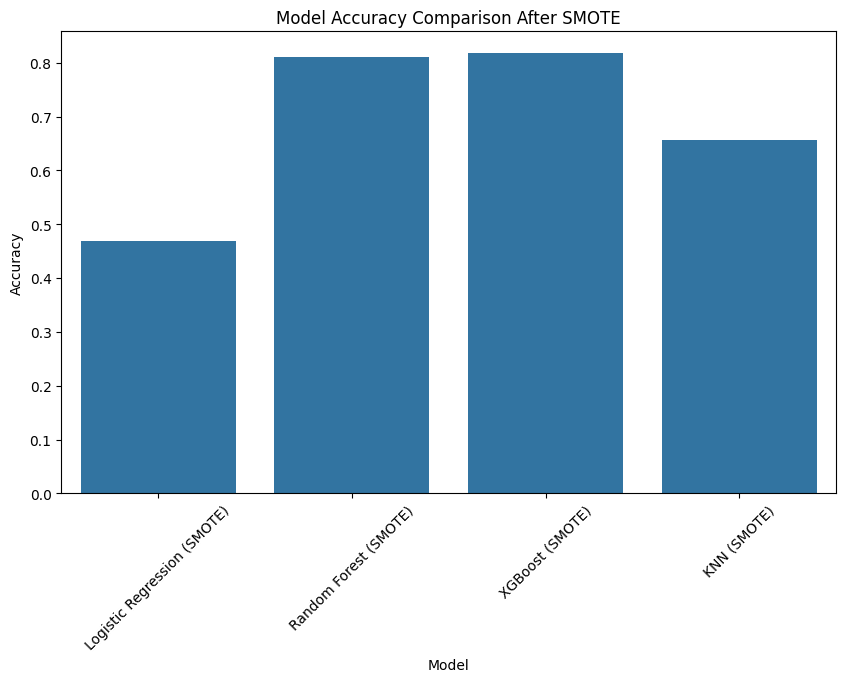

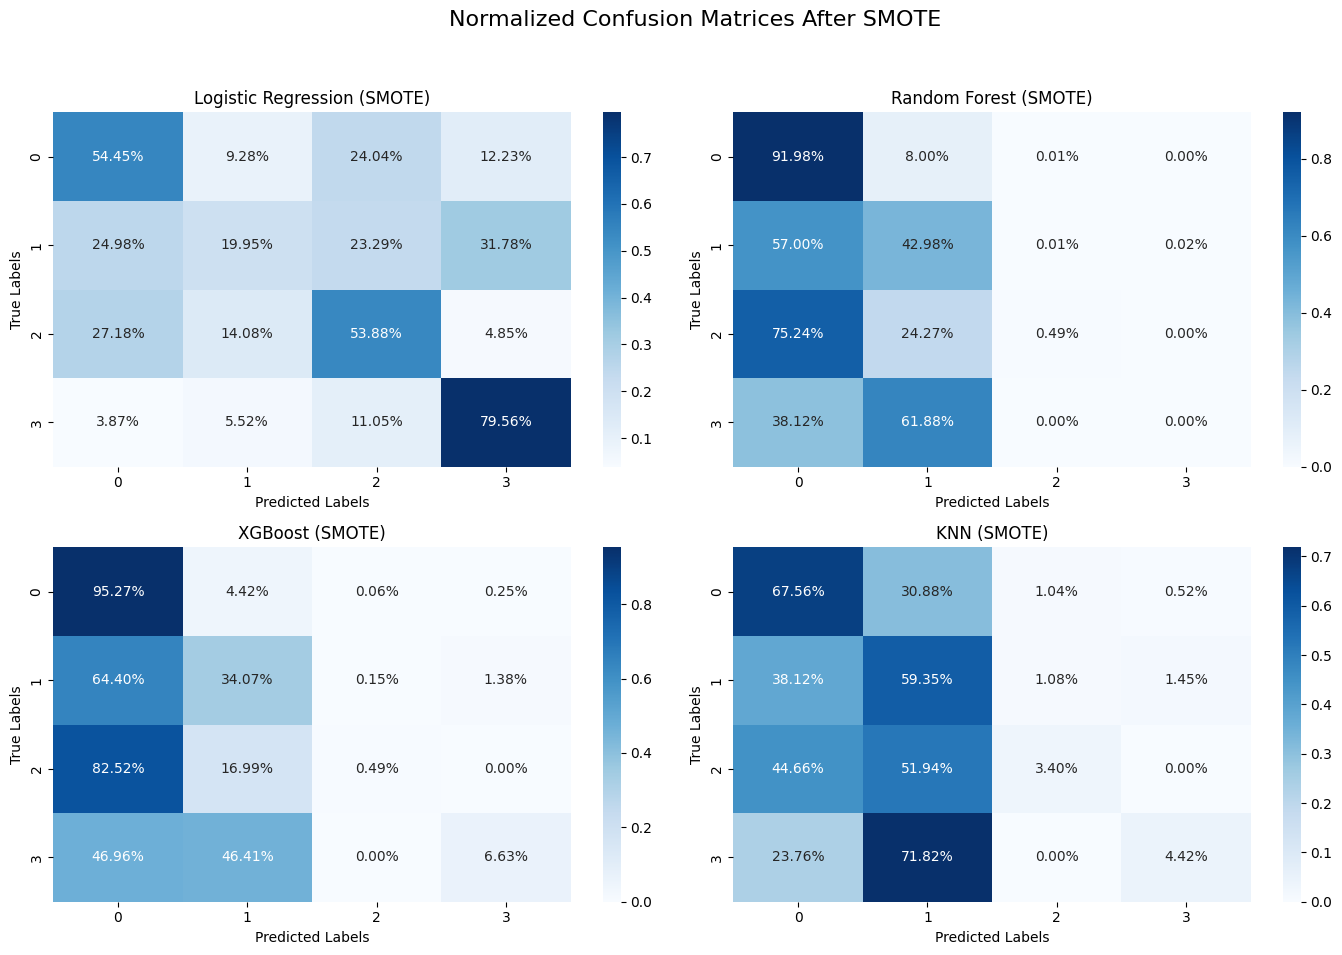

In [ ]:
# Evaluate the models
models_smote = {
    'Logistic Regression (SMOTE)': log_reg_smote_pred,
    'Random Forest (SMOTE)': rand_forest_smote_pred,
    'XGBoost (SMOTE)': xgb_smote_pred,
    'KNN (SMOTE)': knn_smote_pred
}

# Create a DataFrame to store the results
results_smote = []

for model_name, predictions in models_smote.items():
    report = classification_report(y_test, predictions, output_dict=True)
    accuracy = accuracy_score(y_test, predictions)
    results_smote.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Class 0 Precision': report['0']['precision'],
        'Class 1 Precision': report['1']['precision'],
        'Class 2 Precision': report['2']['precision'],
        'Class 3 Precision': report['3']['precision'],
    })

results_smote_df = pd.DataFrame(results_smote)

# Print classification report and confusion matrix
for model_name, predictions in models_smote.items():
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, predictions))
    print(f"Confusion Matrix for {model_name}:\n")
    cm = confusion_matrix(y_test, predictions)
    print(cm)
    print("\n")

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_smote_df)
plt.title('Model Accuracy Comparison After SMOTE')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# Plot Normalized Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Normalized Confusion Matrices After SMOTE', fontsize=16)

for ax, (model_name, predictions) in zip(axes.flatten(), models_smote.items()):
    cm = confusion_matrix(y_test, predictions, normalize='true')
    sns.heatmap(cm, annot=True, fmt='.2%', ax=ax, cmap='Blues')
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

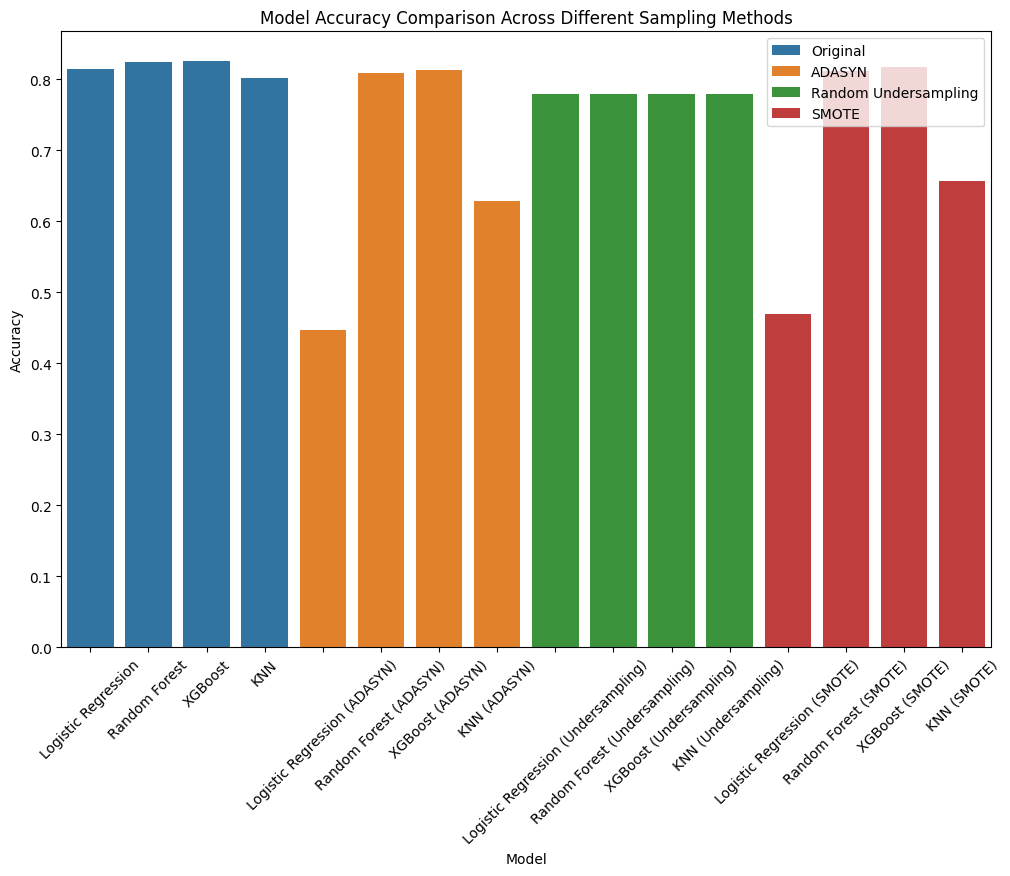

                                  Model  Accuracy  Class 0 Precision  \
0                   Logistic Regression  0.814676           0.824495   
1                         Random Forest  0.823911           0.836273   
2                               XGBoost  0.825963           0.837406   
3                                   KNN  0.801971           0.835329   
4          Logistic Regression (ADASYN)  0.446899           0.891723   
5                Random Forest (ADASYN)  0.808406           0.852527   
6                      XGBoost (ADASYN)  0.812813           0.837036   
7                          KNN (ADASYN)  0.627939           0.863483   
8   Logistic Regression (Undersampling)  0.779440           0.779451   
9         Random Forest (Undersampling)  0.779444           0.779443   
10              XGBoost (Undersampling)  0.779435           0.779673   
11                  KNN (Undersampling)  0.779454           0.779606   
12          Logistic Regression (SMOTE)  0.469265           0.88

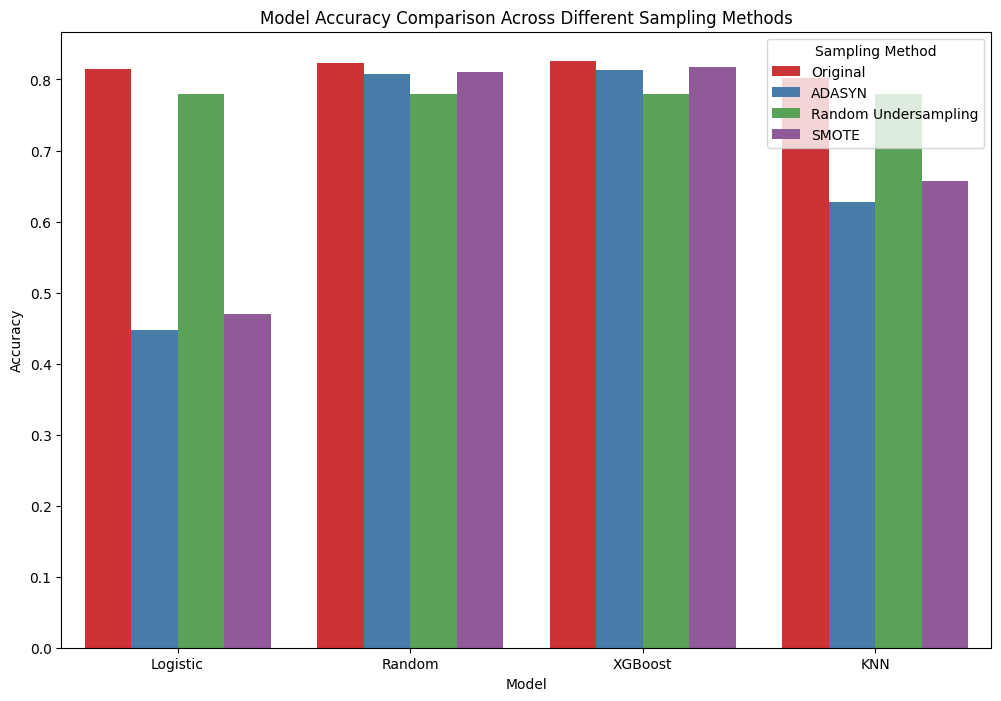

       Model  Accuracy  Class 0 Precision  Class 1 Precision  \
0   Logistic  0.814676           0.824495           0.707287   
1     Random  0.823911           0.836273           0.715133   
2    XGBoost  0.825963           0.837406           0.725268   
3        KNN  0.801971           0.835329           0.583053   
4   Logistic  0.446899           0.891723           0.321576   
5     Random  0.808406           0.852527           0.585593   
6    XGBoost  0.812813           0.837036           0.679264   
7        KNN  0.627939           0.863483           0.328828   
8   Logistic  0.779440           0.779451           0.000000   
9     Random  0.779444           0.779443           0.000000   
10   XGBoost  0.779435           0.779673           0.625000   
11       KNN  0.779454           0.779606           0.833333   
12  Logistic  0.469265           0.885397           0.375804   
13    Random  0.810969           0.850804           0.598201   
14   XGBoost  0.817145           0.83940

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add a new column to identify the sampling method
results_df['Sampling Method'] = 'Original'
results_adasyn_df['Sampling Method'] = 'ADASYN'
results_under_df['Sampling Method'] = 'Random Undersampling'
results_smote_df['Sampling Method'] = 'SMOTE'

# Standardize model names for consistency
results_df['Model'] = results_df['Model'].str.split().str[0]
results_adasyn_df['Model'] = results_adasyn_df['Model'].str.split().str[0]
results_under_df['Model'] = results_under_df['Model'].str.split().str[0]
results_smote_df['Model'] = results_smote_df['Model'].str.split().str[0]

# Concatenate all results
all_results = pd.concat([results_df, results_adasyn_df, results_under_df, results_smote_df], ignore_index=True)

# Plot Accuracy Comparison
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Accuracy', hue='Sampling Method', data=all_results, palette='Set1')
plt.title('Model Accuracy Comparison Across Different Sampling Methods')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.legend(title='Sampling Method', loc='best')
plt.show()

# Print all results for reference
print(all_results)


Available columns in the DataFrame:
Index(['Model', 'Accuracy', 'Class 0 Precision', 'Class 1 Precision',
       'Class 2 Precision', 'Class 3 Precision', 'Sampling Method'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/

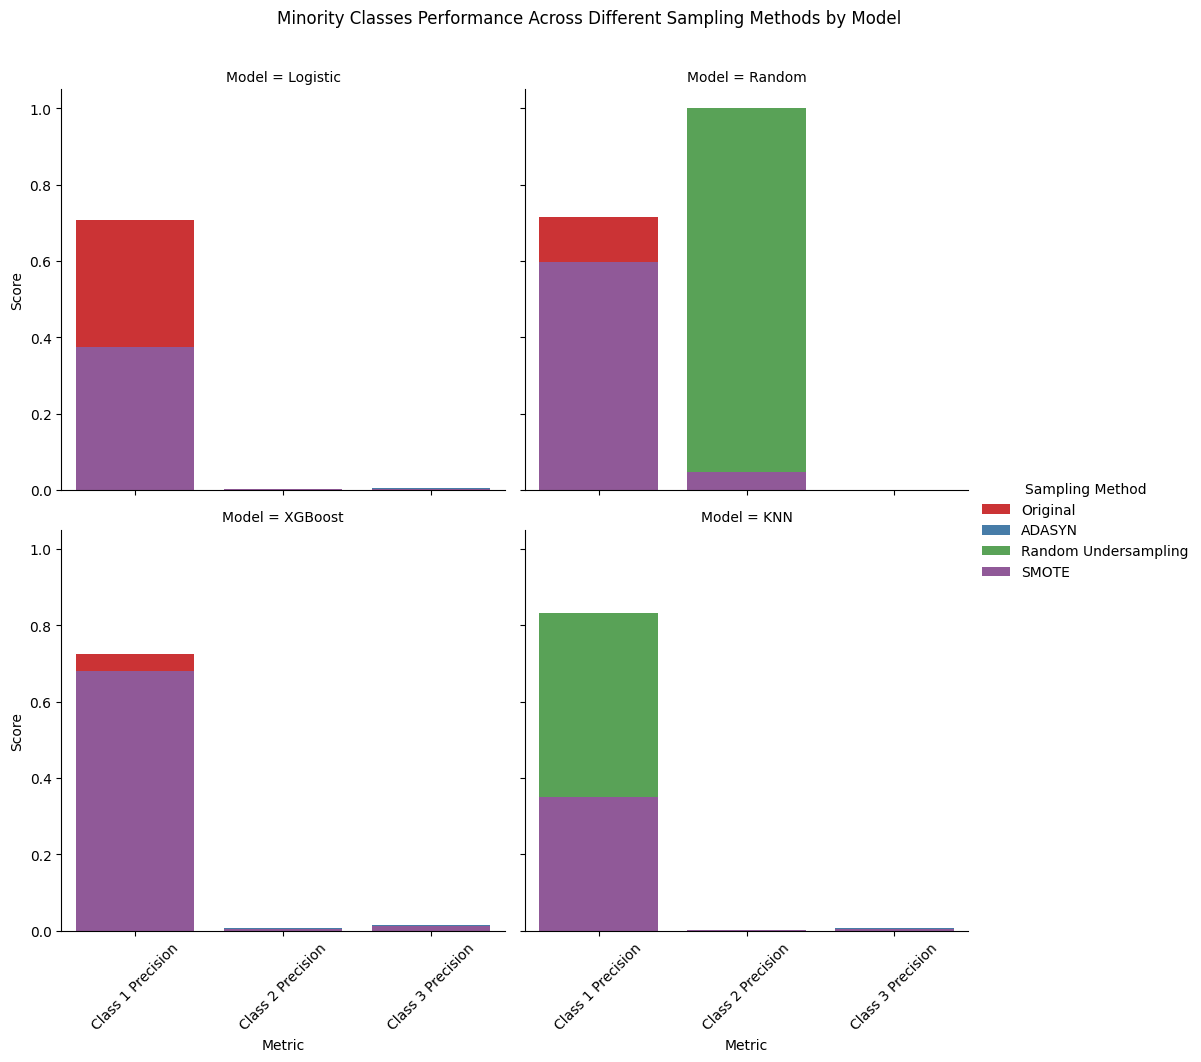

       Model       Sampling Method             Metric     Score
0   Logistic              Original  Class 1 Precision  0.707287
1     Random              Original  Class 1 Precision  0.715133
2    XGBoost              Original  Class 1 Precision  0.725268
3        KNN              Original  Class 1 Precision  0.583053
4   Logistic                ADASYN  Class 1 Precision  0.321576
5     Random                ADASYN  Class 1 Precision  0.585593
6    XGBoost                ADASYN  Class 1 Precision  0.679264
7        KNN                ADASYN  Class 1 Precision  0.328828
8   Logistic  Random Undersampling  Class 1 Precision  0.000000
9     Random  Random Undersampling  Class 1 Precision  0.000000
10   XGBoost  Random Undersampling  Class 1 Precision  0.625000
11       KNN  Random Undersampling  Class 1 Precision  0.833333
12  Logistic                 SMOTE  Class 1 Precision  0.375804
13    Random                 SMOTE  Class 1 Precision  0.598201
14   XGBoost                 SMOTE  Clas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Add a new column to identify the sampling method
results_df['Sampling Method'] = 'Original'
results_adasyn_df['Sampling Method'] = 'ADASYN'
results_under_df['Sampling Method'] = 'Random Undersampling'
results_smote_df['Sampling Method'] = 'SMOTE'

# Standardize model names for consistency
results_df['Model'] = results_df['Model'].str.split().str[0]
results_adasyn_df['Model'] = results_adasyn_df['Model'].str.split().str[0]
results_under_df['Model'] = results_under_df['Model'].str.split().str[0]
results_smote_df['Model'] = results_smote_df['Model'].str.split().str[0]

# Concatenate all results
all_results = pd.concat([results_df, results_adasyn_df, results_under_df, results_smote_df], ignore_index=True)

# Verify available columns
available_columns = all_results.columns
print("Available columns in the DataFrame:")
print(available_columns)

# Adjust value_vars based on available columns
value_vars = ['Class 1 Precision', 'Class 2 Precision', 'Class 3 Precision']
if 'Class 1 Recall' in available_columns:
    value_vars.append('Class 1 Recall')
if 'Class 2 Recall' in available_columns:
    value_vars.append('Class 2 Recall')
if 'Class 3 Recall' in available_columns:
    value_vars.append('Class 3 Recall')
if 'Class 1 F1' in available_columns:
    value_vars.append('Class 1 F1')
if 'Class 2 F1' in available_columns:
    value_vars.append('Class 2 F1')
if 'Class 3 F1' in available_columns:
    value_vars.append('Class 3 F1')

# Extract metrics for minority classes (Class 1, Class 2, Class 3)
minority_metrics = all_results.melt(
    id_vars=['Model', 'Sampling Method'],
    value_vars=value_vars,
    var_name='Metric',
    value_name='Score'
)

# Plot using FacetGrid to include each model separately
g = sns.FacetGrid(minority_metrics, col="Model", hue="Sampling Method", col_wrap=2, height=5, palette='Set1')
g.map(sns.barplot, "Metric", "Score", order=value_vars, ci=None)
g.add_legend(title='Sampling Method')

# Adjust the plot
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Minority Classes Performance Across Different Sampling Methods by Model')
plt.show()

# Print all minority metrics for reference
print(minority_metrics)


Available columns in the DataFrame:
Index(['Model', 'Accuracy', 'Class 0 Precision', 'Class 1 Precision',
       'Class 2 Precision', 'Class 3 Precision', 'Sampling Method'],
      dtype='object')


<ipython-input-29-07e24a917d4a>:57: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Metric', y='Score', hue='Sampling Method', data=minority_metrics, palette='Set1', ci=None)


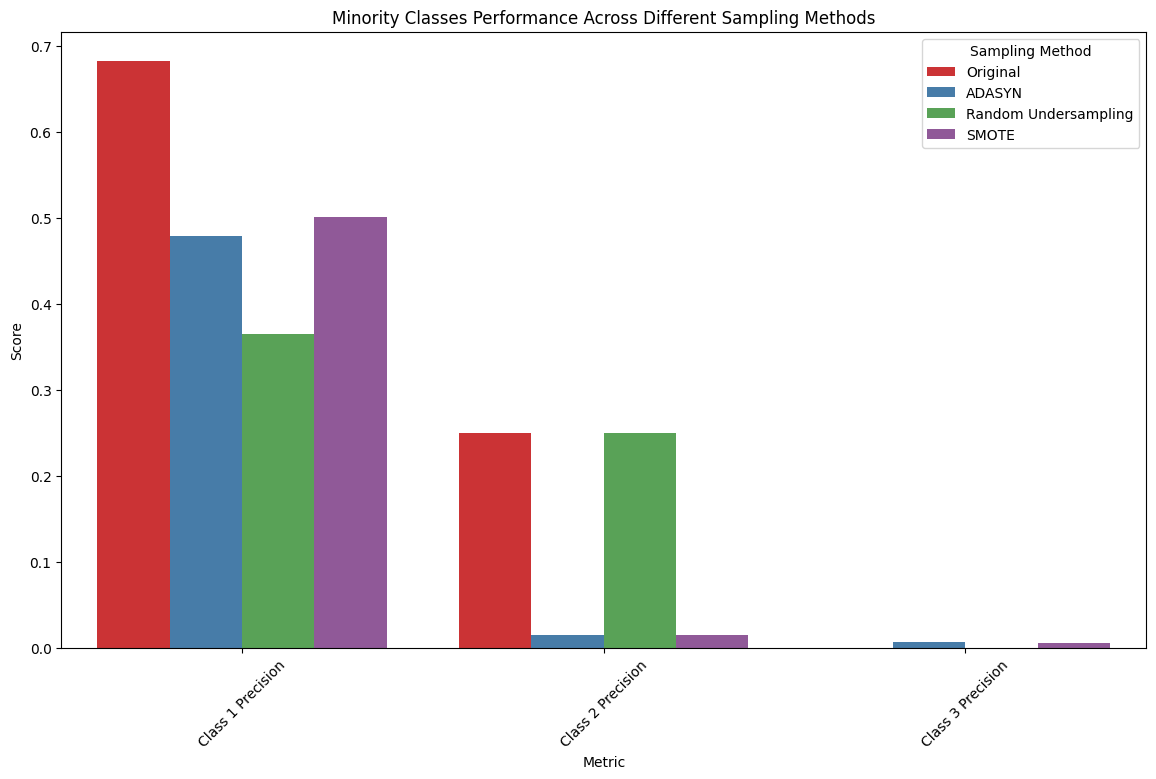

       Model       Sampling Method             Metric     Score
0   Logistic              Original  Class 1 Precision  0.707287
1     Random              Original  Class 1 Precision  0.715133
2    XGBoost              Original  Class 1 Precision  0.725268
3        KNN              Original  Class 1 Precision  0.583053
4   Logistic                ADASYN  Class 1 Precision  0.321576
5     Random                ADASYN  Class 1 Precision  0.585593
6    XGBoost                ADASYN  Class 1 Precision  0.679264
7        KNN                ADASYN  Class 1 Precision  0.328828
8   Logistic  Random Undersampling  Class 1 Precision  0.000000
9     Random  Random Undersampling  Class 1 Precision  0.000000
10   XGBoost  Random Undersampling  Class 1 Precision  0.625000
11       KNN  Random Undersampling  Class 1 Precision  0.833333
12  Logistic                 SMOTE  Class 1 Precision  0.375804
13    Random                 SMOTE  Class 1 Precision  0.598201
14   XGBoost                 SMOTE  Clas

# Esnemble Learning

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Model: Voting Classifier
Accuracy: 0.8261

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90    164839
           1       0.73      0.33      0.46     46258
           2       0.00      0.00      0.00       206
           3       0.00      0.00      0.00       181

    accuracy                           0.83    211484
   macro avg       0.39      0.33      0.34    211484
weighted avg       0.81      0.83      0.80    211484


------------------------------------------------------------

Model: Stacking Classifier
Accuracy: 0.8256

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90    164839
           1       0.71      0.35      0.47     46258
           2       0.00      0.00      0.00       206
           3       0.00      0.00      0.00       181

    accuracy                           0.83    211484
   macro avg       0.39      0.33      0.3

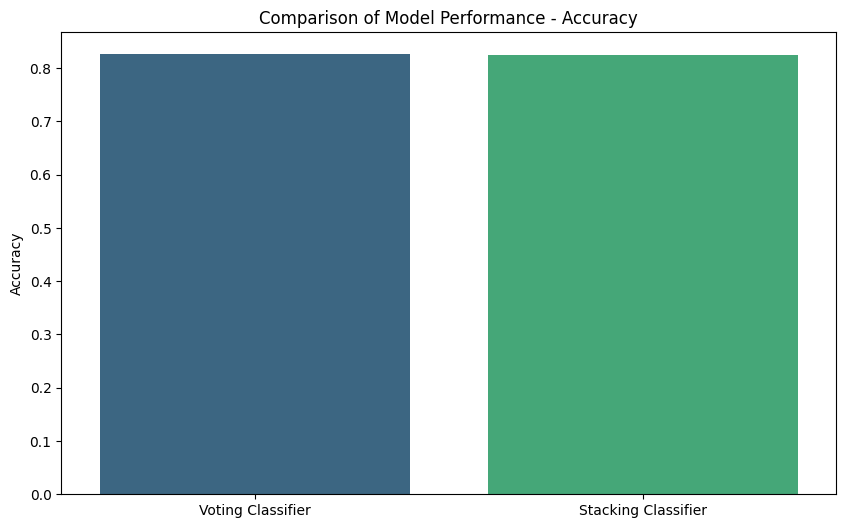

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the base models
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
log_reg = LogisticRegression(n_jobs=-1)

# Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb)], voting='soft', n_jobs=-1)

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=[('rf', rf), ('xgb', xgb)], final_estimator=log_reg, passthrough=True, n_jobs=-1)

# Train and evaluate each model
models = {
    'Voting Classifier': voting_clf,
    'Stacking Classifier': stacking_clf,
}

results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Store results
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Report': classification_report(y_test, y_pred)
    }

# Print classification reports and metrics
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("\nClassification Report:")
    print(metrics['Report'])
    print("\n" + "-"*60 + "\n")

# Plot the accuracy for comparison
accuracy_df = pd.DataFrame({model_name: [metrics['Accuracy']] for model_name, metrics in results.items()})

plt.figure(figsize=(10, 6))
sns.barplot(data=accuracy_df, palette='viridis')
plt.title('Comparison of Model Performance - Accuracy')
plt.ylabel('Accuracy')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Model: Voting Classifier

Precision Scores:
Class 0: 0.8368
Class 1: 0.7299
Class 2: 0.0000
Class 3: 0.0000

Classification Report:
              precision    recall  f1-score      support
0              0.836824  0.965973  0.896772  164839.0000
1              0.729875  0.334580  0.458829   46258.0000
2              0.000000  0.000000  0.000000     206.0000
3              0.000000  0.000000  0.000000     181.0000
accuracy       0.826100  0.826100  0.826100       0.8261
macro avg      0.391675  0.325138  0.338900  211484.0000
weighted avg   0.811900  0.826100  0.799340  211484.0000

------------------------------------------------------------

Model: Stacking Classifier

Precision Scores:
Class 0: 0.8391
Class 1: 0.7128
Class 2: 0.0000
Class 3: 0.0000

Classification Report:
              precision    recall  f1-score        support
0              0.839148  0.961259  0.896063  164839.000000
1              0.712817  0.349150  0.468716   46258.000000
2              0.000000  0.000000  0.0

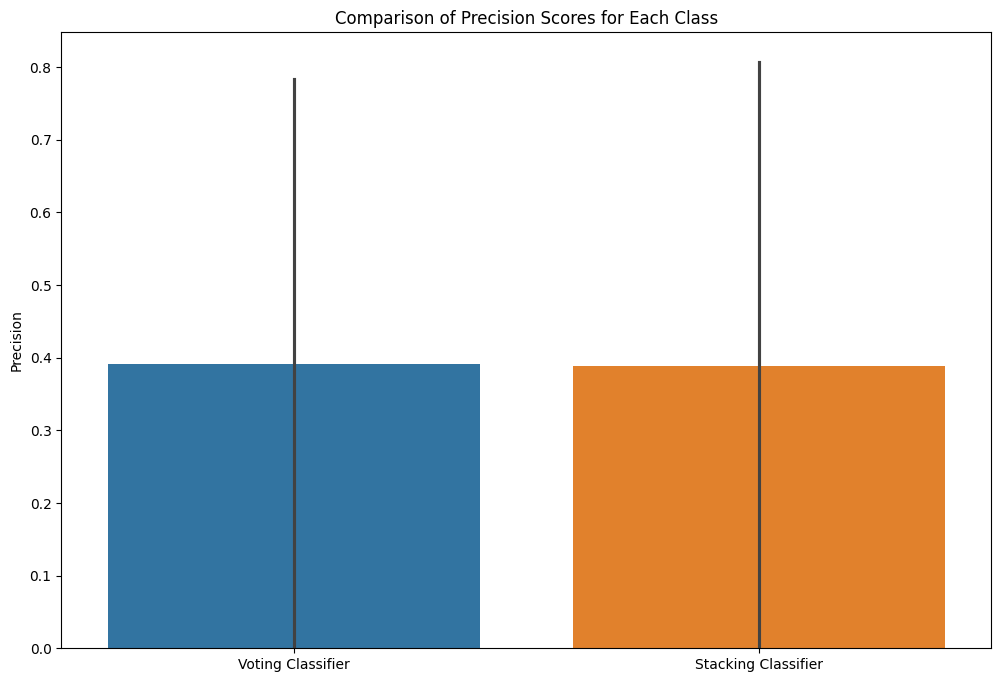

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the base models
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
log_reg = LogisticRegression(n_jobs=-1)

# Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb)], voting='soft', n_jobs=-1)

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=[('rf', rf), ('xgb', xgb)], final_estimator=log_reg, passthrough=True, n_jobs=-1)

# Train and evaluate each model
models = {
    'Voting Classifier': voting_clf,
    'Stacking Classifier': stacking_clf,
}

results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Get precision scores for each class
    precision_scores = precision_score(y_test, y_pred, average=None)

    # Store results
    results[model_name] = {
        'Precision Scores': precision_scores,
        'Report': classification_report(y_test, y_pred, output_dict=True)
    }

# Print classification reports and precision scores
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print("\nPrecision Scores:")
    for i, score in enumerate(metrics['Precision Scores']):
        print(f"Class {i}: {score:.4f}")
    print("\nClassification Report:")
    print(pd.DataFrame(metrics['Report']).transpose())
    print("\n" + "-"*60 + "\n")

# Plot the precision for each class
precision_df = pd.DataFrame({model_name: metrics['Precision Scores'] for model_name, metrics in results.items()})

precision_df.index = [f'Class {i}' for i in precision_df.index]

plt.figure(figsize=(12, 8))
sns.barplot(data=precision_df)
plt.title('Comparison of Precision Scores for Each Class')
plt.ylabel('Precision')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Model: Voting Classifier

Precision Scores:
Class 0: 0.8368
Class 1: 0.7299
Class 2: 0.0000
Class 3: 0.0000

Classification Report:
              precision    recall  f1-score      support
0              0.836824  0.965973  0.896772  164839.0000
1              0.729875  0.334580  0.458829   46258.0000
2              0.000000  0.000000  0.000000     206.0000
3              0.000000  0.000000  0.000000     181.0000
accuracy       0.826100  0.826100  0.826100       0.8261
macro avg      0.391675  0.325138  0.338900  211484.0000
weighted avg   0.811900  0.826100  0.799340  211484.0000

------------------------------------------------------------

Model: Stacking Classifier

Precision Scores:
Class 0: 0.8391
Class 1: 0.7128
Class 2: 0.0000
Class 3: 0.0000

Classification Report:
              precision    recall  f1-score        support
0              0.839148  0.961259  0.896063  164839.000000
1              0.712817  0.349150  0.468716   46258.000000
2              0.000000  0.000000  0.0

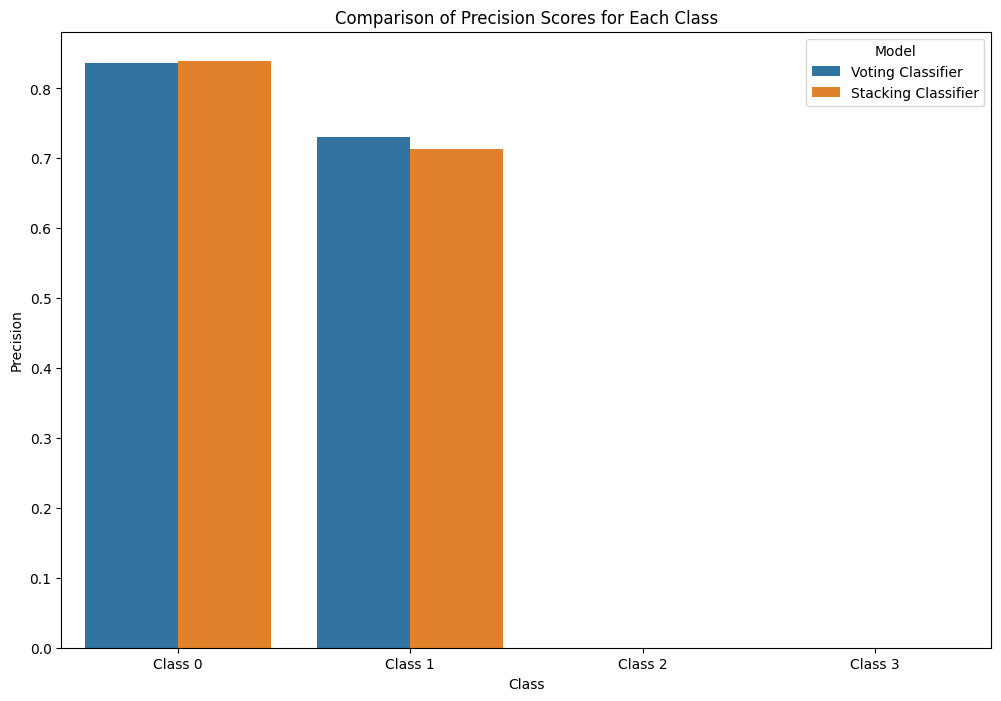

In [13]:
# Define the base models
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
log_reg = LogisticRegression(n_jobs=-1)

# Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb)], voting='soft', n_jobs=-1)

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=[('rf', rf), ('xgb', xgb)], final_estimator=log_reg, passthrough=True, n_jobs=-1)

# Train and evaluate each model
models = {
    'Voting Classifier': voting_clf,
    'Stacking Classifier': stacking_clf,
}

results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Get precision scores for each class
    precision_scores = precision_score(y_test, y_pred, average=None)

    # Store results
    results[model_name] = {
        'Precision Scores': precision_scores,
        'Report': classification_report(y_test, y_pred, output_dict=True)
    }

# Print classification reports and precision scores
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print("\nPrecision Scores:")
    for i, score in enumerate(metrics['Precision Scores']):
        print(f"Class {i}: {score:.4f}")
    print("\nClassification Report:")
    print(pd.DataFrame(metrics['Report']).transpose())
    print("\n" + "-"*60 + "\n")

# Prepare data for plotting
precision_data = {
    'Class': [],
    'Precision': [],
    'Model': []
}

for model_name, metrics in results.items():
    for i, score in enumerate(metrics['Precision Scores']):
        precision_data['Class'].append(f'Class {i}')
        precision_data['Precision'].append(score)
        precision_data['Model'].append(model_name)

precision_df = pd.DataFrame(precision_data)

# Plot the precision for each class
plt.figure(figsize=(12, 8))
sns.barplot(x='Class', y='Precision', hue='Model', data=precision_df)
plt.title('Comparison of Precision Scores for Each Class')
plt.ylabel('Precision')
plt.show()

In [16]:
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Undersampling
undersampler = RandomUnderSampler(sampling_strategy='not majority', random_state=42)
X_resampled_under, y_resampled_under = undersampler.fit_resample(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Model: Voting Classifier

Precision Scores:
Class 0: 0.7795
Class 1: 0.0000
Class 2: 0.0000
Class 3: 0.0000

Classification Report:
              precision   recall  f1-score       support
0              0.779476  1.00000  0.876074  164839.00000
1              0.000000  0.00000  0.000000   46258.00000
2              0.000000  0.00000  0.000000     206.00000
3              0.000000  0.00000  0.000000     181.00000
accuracy       0.779440  0.77944  0.779440       0.77944
macro avg      0.194869  0.25000  0.219018  211484.00000
weighted avg   0.607555  0.77944  0.682847  211484.00000

------------------------------------------------------------

Model: Stacking Classifier

Precision Scores:
Class 0: 0.7795
Class 1: 0.0000
Class 2: 0.0000
Class 3: 0.0000

Classification Report:
              precision   recall  f1-score       support
0              0.779546  1.00000  0.876118  164839.00000
1              0.000000  0.00000  0.000000   46258.00000
2              0.000000  0.00000  0.000000  

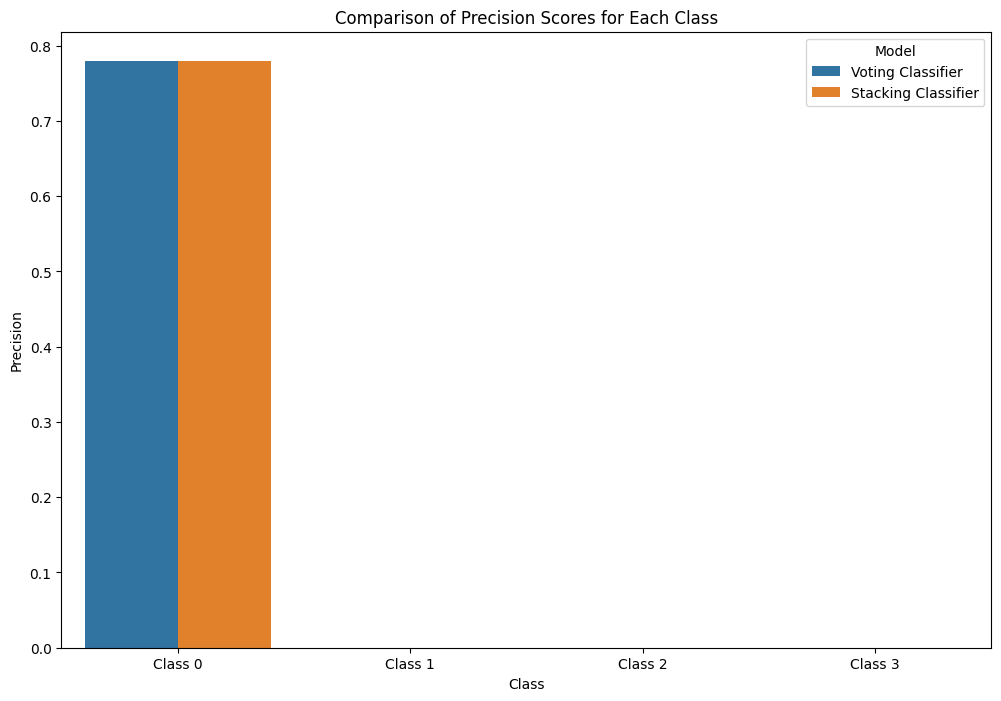

In [18]:
# Define the base models
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
log_reg = LogisticRegression(n_jobs=-1)

# Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb)], voting='soft', n_jobs=-1)

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=[('rf', rf), ('xgb', xgb)], final_estimator=log_reg, passthrough=True, n_jobs=-1)

# Train and evaluate each model
models = {
    'Voting Classifier': voting_clf,
    'Stacking Classifier': stacking_clf,
}

results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_resampled_under, y_resampled_under)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Get precision scores for each class
    precision_scores = precision_score(y_test, y_pred, average=None)

    # Store results
    results[model_name] = {
        'Precision Scores': precision_scores,
        'Report': classification_report(y_test, y_pred, output_dict=True)
    }

# Print classification reports and precision scores
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print("\nPrecision Scores:")
    for i, score in enumerate(metrics['Precision Scores']):
        print(f"Class {i}: {score:.4f}")
    print("\nClassification Report:")
    print(pd.DataFrame(metrics['Report']).transpose())
    print("\n" + "-"*60 + "\n")

# Prepare data for plotting
precision_data = {
    'Class': [],
    'Precision': [],
    'Model': []
}

for model_name, metrics in results.items():
    for i, score in enumerate(metrics['Precision Scores']):
        precision_data['Class'].append(f'Class {i}')
        precision_data['Precision'].append(score)
        precision_data['Model'].append(model_name)

precision_df = pd.DataFrame(precision_data)

# Plot the precision for each class
plt.figure(figsize=(12, 8))
sns.barplot(x='Class', y='Precision', hue='Model', data=precision_df)
plt.title('Comparison of Precision Scores for Each Class')
plt.ylabel('Precision')
plt.show()

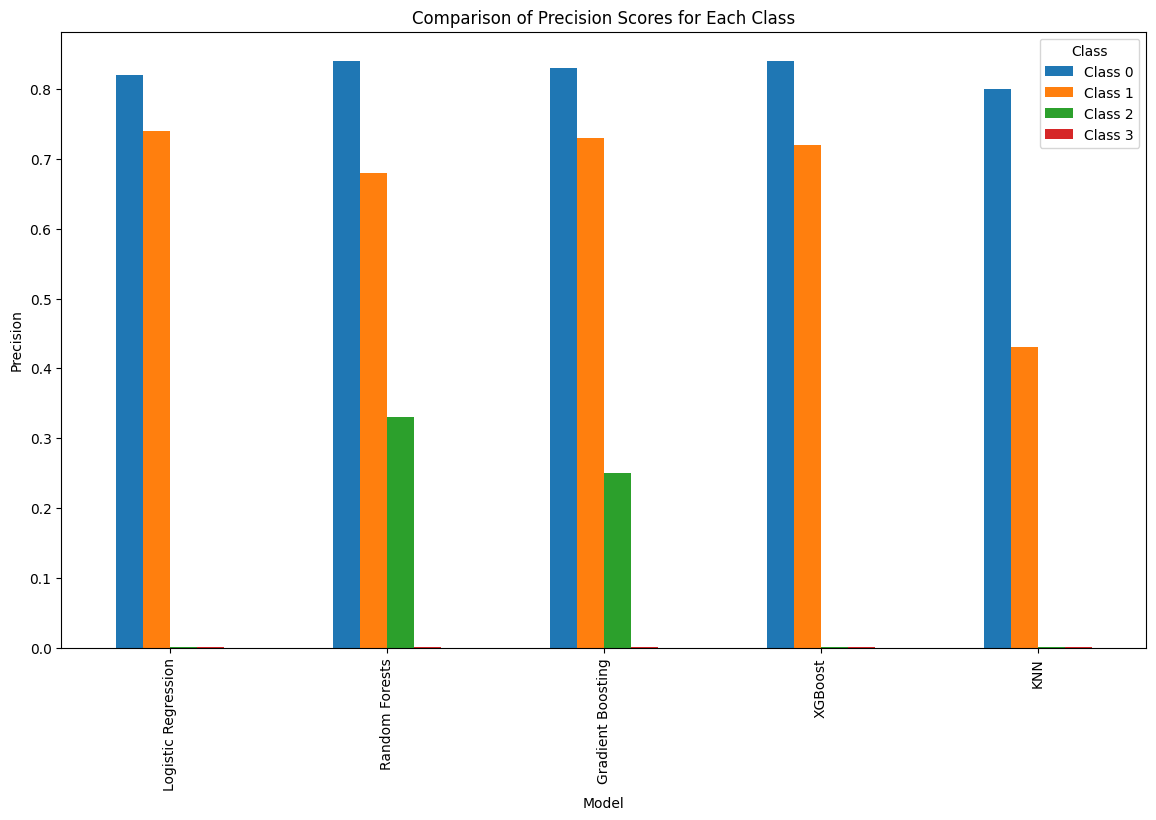

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Manually extracted precision scores from the provided classification reports
precision_data = {
    'Model': ['Logistic Regression', 'Random Forests', 'Gradient Boosting', 'XGBoost', 'KNN'],
    'Class 0': [0.82, 0.84, 0.83, 0.84, 0.80],
    'Class 1': [0.74, 0.68, 0.73, 0.72, 0.43],
    'Class 2': [0.001, 0.33, 0.25, 0.001, 0.001],
    'Class 3': [0.001, 0.001, 0.001, 0.001, 0.001]
}

# Create a DataFrame
precision_df = pd.DataFrame(precision_data)

# Set the Model column as the index
precision_df.set_index('Model', inplace=True)

# Plot the precision for each class
precision_df.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Precision for Each Class')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.legend(title='Class')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Manually extracted precision scores from the provided classification reports
accuracy_data = {
    'Model': ['Logistic Regression', 'Random Forests', 'Gradient Boosting', 'XGBoost', 'KNN'],
    'Class 0': [0.82, 0.84, 0.83, 0.84, 0.80],
    'Class 1': [0.74, 0.68, 0.73, 0.72, 0.43],
    'Class 2': [0.001, 0.33, 0.25, 0.001, 0.001],
    'Class 3': [0.001, 0.001, 0.001, 0.001, 0.001]
}

# Create a DataFrame
precision_df = pd.DataFrame(precision_data)

# Set the Model column as the index
precision_df.set_index('Model', inplace=True)

# Plot the precision for each class
precision_df.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Overall Accuracy for Each Class')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.legend(title='Class')
plt.show()
